# Naredbe programskog toka

**Sadržaj:**
1. [For petlja](#For-petlja)
1. [Operatori sa bool izlazom](#Operatori-sa-bool-izlazom)
    1. [Operatori poređenja](#Operatori-poređenja)
    1. [Logički operatori](#Logički-operatori)
    1. [Operatori sa bool izlazom](#Operatori-sa-bool-izlazom)
    1. [Prioritet izvršenja operatora](#Prioritet-izvršenja-operatora)
1. [Naredbe grananja](#Naredbe-grananja)
    1. [Naredba `if`](#Naredba-if)
    1. [Ugnježdene `if` naredbe](#Ugnježdene-if-naredbe)
    1. [Lančano uslovno grananje](#Lančano-uslovno-grananje)
1. [While petlja](#While-petlja)

In [1]:
import numpy as np
import numpy.random as rndm
from timeit import default_timer as timer

***

## For petlja

Jedna od osnovnih karakteristika rada na računaru jeste mogućnost ponavljanja jedne ili više operacija proizvoljan broj puta. U numeričkoj matematici programski blokovi koji se ponavljaju više puta za poboljšanje neke računate vrednosti nazivaju se iteracije. Veoma je bitno definisati, tj. ograničiti broj izvršenih iteracija kako bi se do rezultata došlo u konačno mnogo koraka. Kada je broj neophodnih iteracija poznat, za programsku realizaciju iteracija pogoduje `for` petlja.
Njena sintaksa u Pythonu je:

>```python
for indeks in iterativni_objekat:
    telo_petlje
>```

`indeks` označava ime promenljive čijim skupom vrednosti je definisan ukupan broj iteracija. `iterativni_objekat` je domen promenljive `indeks`, tj. njen skup vrednosti. Taj objekat mora da bude nekog od [iterabilnih](https://python.cogsci.nl/basic/iterables/) tipova podataka kao što su lista, niz, string, itd.
`telo_petlje` čini skup instrukcija koje je potrebno ponavljati pri svakoj iteraciji. Python ih prepoznaje na osnovu simbola `:` i jednakim uvlačenjem reda za svaku od instrukcija. Kraj tela petlje označava prva naredba koja je bez uvučenog reda, ili kraj kodne ćelije.



Za kratak uvod u iteracije možete pogledati i [video](https://www.youtube.com/watch?v=X1-UNHUajfk&feature=emb_title) na engleskom jeziku.

**Primer 1.** U sledećoj kodnoj ćeliji promenljiva `indeks` nosiće oznaku `ime`, imaće skup vrednosti od tri elementa zadata listom `["Raja", "Gaja", "Vlaja"]`. Zbog toga će telo petlje da se izvrši tri puta. Prvi red koda koji nije uvučen označava završetak petlje i mesto odakle počinju instrukcije koje se izvršavaju po izlasku iz `for` petlje. Drugim rečima, Python koristi tabulaciju za oznake blokova koda koji se npr. u C-u izdvajaju zagradama \{\}.

In [2]:
prolaz=0
for ime in ["Raja", "Gaja", "Vlaja"]:
    print(ime, "je Pajin sestrić")
    prolaz+=1
    print("Ovo je iteracija broj ",prolaz)
print("Ovo nije deo petlje")

Raja je Pajin sestrić
Ovo je iteracija broj  1
Gaja je Pajin sestrić
Ovo je iteracija broj  2
Vlaja je Pajin sestrić
Ovo je iteracija broj  3
Ovo nije deo petlje


Slično je kreirana i naredna `for` petlja.

In [3]:
for voće in ['jabuka','šljiva','dunja','višanja']:
    print('Pita od ', voće)

Pita od  jabuka
Pita od  šljiva
Pita od  dunja
Pita od  višanja


***

For petlja se veoma često koristi u kombinaciji sa naredbom [`range`]. Sam poziv funkcije ima sledeću strukturu:

>```python
range([start=0,] stop [,korak=1])
>```

Ovom naredbom se generiše niz ekvidistantnih (na jednakom rastojanju) vrednosti unutar zadatog opsega sa tačno definisanim razmakom - aritmetichki niz brojeva. Uglastim zagradama naznačeni su opcioni argumenti pri pozivu `start` i `korak`. Ove vrednosti nije neophodno navoditi prilikom poziva naredbe. Ukoliko argument `start` nije naveden podrazumeva se da je 0. Kada argument `korak` nije naveden, podrazumeva se da je 1. Pozitivnom vrednošću argumenta `korak` generiše se rastući aritmetički niz, a negativnom opadajući. Vrednosti članova aritmetičkog niza koji se kreira naredbom `range` glase
$$start+k*korak,\qquad k=0,1,\dots,max$$
Primetimo da početna vrednost indeksa $k=0$ opisuje da se `start` uključuje kao prvi element. Poslednja vrednost indeksa $k=max,$ samim tim i broj elemenata niza, određen je uslovom da poslednje generisani član niza ne prelazi vrednost `stop` u smeru kreiranja tog niza (rastući ili opadajući).

Obratiti pažnju na poslednji element liste generisan ovom funkcijom, vrednost `stop` je **granica koja se ne postiže**. Kroz naredne kodne ćelije upoznaćemo specifičnost ove naredbe.

Za rastući niz potrebno je da važi
>start < stop

dok za opadajući niz mora biti
>start > stop

U suprotnom naredba `range` vraća prazan niz, tj. niz bez elemenata. 

**Primer 2.** Posmatramo izlaz kodnih ćelija pri pozivu naredbe `range`.

In [4]:
range(6)

range(0, 6)

Zaključujemo da je izlaz ove naredbe objekat posebnog tipa. Njegovim prevođenjem u listu možemo da pregledamo sadržaj objekta.

In [5]:
list(range(6))  #prevođenje range u listu

[0, 1, 2, 3, 4, 5]

In [6]:
range(1,9,2)

range(1, 9, 2)

In [7]:
list(range(1,9,2))   #prevođenje range u listu

[1, 3, 5, 7]

Ovaj mali eksperiment pokazuje da je izlaz naredbe `range` specijalan objekat koji može lako da se prevede u listu upotrebom naredbe `list()`.  Pojedinačni elementi objekata tipa `range` generišu se jedan po jedan isključivo po potrebi. To upravo odgovara strukturi naredbe `for` gde promenljiva koja je indeks petlje za svaku iteraciju uzima tačno jednu vrednost. Oponašajući ovakav način generisanja vrednosti `range` tip čuva memorijski prostor ne generišući objekat tipa lista za skup svih vrednosti indeksa. 

***

**Primer 3.** Način kombinovanja naredbi `for` i `range` dat je narednom kodnom ćelijom. 

In [8]:
for x in range(6,-6,-3):
    print(x)

6
3
0
-3


Ušteda memorijskog prostora prilikom primene naredbe `range` u odnosu na postojeću listu vrednosti dolazi uz manju razliku u vremenu izvršenja. Član-po-član generisanje elemenata za svaku iteraciju troši dodatno vreme. To ćemo pokazati u narednom kodu. Merićemo vreme izvršenja `for` petlje nad listom i `range` tipom iste dužine.

In [18]:
start = timer()
for indeks in range(10000):
    b=indeks
end = timer()
print(end - start) # Vreme je izraženo u sekundama    

0.001612700056284666


In [19]:
lista=list(range(10000))

In [20]:
start = timer()
for indeks in lista:
    b=indeks
end = timer()
print(end - start)    

0.0015654000453650951


***

## Operatori sa bool izlazom

Logički iskaz je svaki izraz čija je vrednost tačno ili netačno, tj. svaki izraz koji evaluira u tačno jednu logičku vrednost. Python poseduje tip podataka koji podržava iskaze i operacije nad njima. `bool` tip podataka uzima dve moguće vrednosti `True` i `False`. Spada u brojevni tip podataka.

Python poseduje veliki broj funkcija koje generišu ili koriste izlaz tipa `bool`. U nastavku upoznaćemo neke važnije od njih kroz primere.

***

### Operatori poređenja

Operator jednakosti `==` poredi vrednosti dva objekta i u zavisnosti od njihove jednakosti proizvodi logičku vrednost tačno ili netačno.
Operator jednakosti `==` jedan je od $6$ standardnih operatora poređenja. Preostali su:

|operator poređenja|$\phantom{WWWWWWWWWWWW}$|objašnjenje|
|---|---|---|
|$x$ != $y$|         |$x$ je različito od $y$|
|$x$ > $y$|          |$x$ je veće od $y$|
|$x$ < $y$|          |$x$ je manje od $y$|
|$x$ >= $y$|         | $x$ je veće ili jednako od $y$|
|$x$ <= $y$|         | $x$ je manje ili jednako $y$|

In [21]:
5==5

True

In [22]:
5==6

False

In [23]:
5<=6

True

<div class="alert alert-block alert-info">
<b>Napomena:</b>
Obratiti pažnju da je u Pythonu simbol `=` rezervisan za dodelu vrednosti, dok se poređenje vrednosti postiže sa `==`.
</div>

In [24]:
5=6

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (789037922.py, line 1)

**Zadatak 1.** Od datih izraza, koji sve predstavljaju logički izraz (bilo tačan ili netačan)? 

- [x] A. True
- [x] B. 3 == 4
- [ ] C. 3 + 4
- [x] D. 3 + 4 == 7
- [ ] E. "False"
- [ ] F. a = 3 + 4

***

### Logički operatori

Postoje tri logička operatora za operacije nad iskazima: `and`, `or` i `not`. Njihova uloga je logičkog **i**, **ili** i **negacije**, redom. Podsetićemo se tablica istinitosti ovih operacija.

<div>
   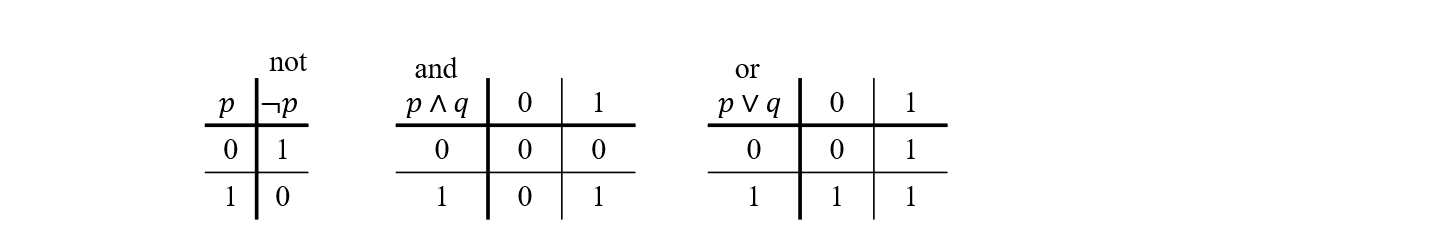  
</div>

Proverićemo tablice istinitosti kodom.

In [3]:
for P in [False, True]:
    print(P, not P)

True False
False True


In [8]:
for P in [False, True]:
    for Q in [False, True]:
        print(P,Q,P and Q)

False False False
False True False
True False False
True True True


In [9]:
for P in [False, True]:
    for Q in [False, True]:
        print(P,Q,P or Q)

False False False
False True True
True False True
True True True


**Primer 4.** Primetimo da Python ne poseduje specijalno ugrađene funkcije za implikaciju $\Longrightarrow$, ekvivalenciju $\Longleftrightarrow$ i ekskluzivno ili $\underline{\vee}.$ 

<div>
   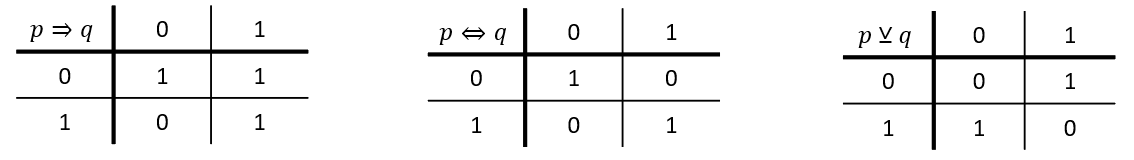  
</div>

To se moze prevazići time što Python tretira vrednosti logičkih izlaza kao celobrojne vrednosti $0$ i $1.$ Tada se implikacija menja simbolom `<=`, ekvivalencija simbolom `==`, i eksluzivno ili sa `!=`.

In [7]:
for P in [False, True]:
    for Q in [False, True]:
        print(P,Q,P<=Q)

False False True
False True True
True False False
True True True


In [5]:
for P in [False, True]:
    for Q in [False, True]:
        print(P,Q,P==Q)

False False True
False True False
True False False
True True True


In [6]:
for P in [False, True]:
    for Q in [False, True]:
        print(P,Q,P!=Q)

False False False
False True True
True False True
True True False


***

**Primer 5.** Proverom pomoću istinitosne tablice pokazaćemo tautologiju
$$(P\Longrightarrow Q)\Longleftrightarrow(\neg P\vee Q) $$

In [12]:
for P in [False, True]:
    for Q in [False, True]:
        print((P<=Q)==(not P or Q))

True
True
True
True


***

**Primer 6.** Logički operatori i operatori poređenja se kombinuju za dobijanje složenih logičkih izraza.

In [49]:
x, y = 1.6, -3
print(x>=0 and x<8.3)
print(y>=0 and y<8.3)

n = 25
print(n%3 == 0 or n%7 == 1)
print(n%2 == 0 or n%5 == 0)

True
False
False
True


***

**Primer 7.** Godina je prestupna kada je deljiva sa 4, osim ako nije još i deljiva sa 100. Ako je deljiva i sa 400, onda jeste prestupna. Napisaćemo kod kojim se traži korisnički unos godine. Izlaz koda biće `True` ukoliko je korisnik uneo prestupnu godinu, u suprotnom izlaz će biti `False`.

Naredna tabela daje primere nekih prestupnih godina i onih koje to nisu.

|Godina|Prestupna|
|---|---|
|1944|Da|
|2011|Ne|
|1986|Ne|
|1800|Ne|
|1900|Ne|
|2000|Da|
|2056|Da|

In [27]:
godina=int(input("Unesite godinu:"))
prestupna= (godina%4==0 and (godina%100!=0 or godina%400==0))
print(prestupna) 

Unesite godinu:2000
True


***

### Prioritet izvršenja operatora

Aritmetičke operacije su starije u odnosu na sve operatore koji za rezultat vraćaju logičku (bool) vrednost. Dakle, Python će uvek prvo da izračunava vrednost aritmetičkog izraza. Sledeći po prioritetu su operatori poređenja, na kraju liste prioriteta su logički operatori. To smo mogli da uočimo u prethodnom primeru. 

Narednom tabelom data je Python hijerarhija različitih operatora. Kompletna lista operatora prema prioritetu u Pythonu može da se nađe u [Dokumentacionom centru](https://docs.python.org/3/reference/expressions.html#expression-lists).

|Nivo|Kategorija|Operatori|
|---|---|---|
|7|eksponent|$**$|
|6|množenje|$*$,/,//,%|
|5|sabiranje|+,-|
|4|poređenje|==,!=,<=,>=,>,<|
|3|logički|not,~|
|2|logički|and,&|
|1|logički|or,$||$|

***

## Naredbe grananja

Python poseduje i odgovarajuće naredbe grananja. Upoznaćemo njihovu sintaksu kroz primere.

### Naredba if



Najjednostavniji oblik naredbe uslovnog izbora je `if-else` naredba. Uslov grananja zadaje se logičkim izrazom. Upotreba ove naredbe vezana je za binarno grananje. Sintaksa glasi:

>```python
if Bool_izraz:
    blok_naredbi_1        # izvršava se ukoliko je vrednost Bool_izraza True
else:
    blok_naredbi_2        # izvršava se ukoliko je vrednost Bool_izraza False
>```

Obratite pažnju na simbol `:` koji označava početak programskog bloka odgovarajuće `if` grane. Blok naredbi svake grane sintaksno se uvlači jedan tab.

**Primer 8.** Napravićemo program kojim se za uneti ceo broj određuje da li je paran ili ne. Uvlačenje reda je deo obavezne Python sintakse i njime se određuje programski blok za svaku od `if-else` grana. Prekidom uvlačenja reda označava se deo programskog bloka izvan `if-else` grana, tj. sekvencijalni nastavak instrukcija.

In [28]:
x = int(input("Unesite neki ceo broj:"))

if x % 2 == 0:
    print(x, "je paran")
    print("I dalje traje True blok")
else:
    print(x, "je neparan")
    print("I dalje traje else blok")
print("Ovo nije deo if naredbe i uvek se štampa!")

Unesite neki ceo broj:123
123 je neparan
I dalje traje else blok
Ovo nije deo if naredbe i uvek se štampa!


***

Za primenu naredbe `if` nije neophodno koristiti `else` granu. Ovakva sintaksna forma koristi se u situaciji kada se kreira unarna selekcija, tj. kada se obrađuje neki izuzetak. 

Ne postoji ograničenje za broj instrukcija u bilo kojoj od grana `if` naredbe. Ali, svaka od otvorenih grana mora da sadrži bar jednu instrukciju u svom bloku.

**Primer 9.** Napisaćemo funkciju kojom se vraća lista delilaca nekog celog broja.

In [29]:
def faktori(broj):
    ListaFaktora = []
    if int(broj):
        for i in range(1,broj+1):
            if broj % i == 0:
                ListaFaktora.append(i)
    return ListaFaktora

In [30]:
faktori(25)

[1, 5, 25]

In [31]:
faktori(136)

[1, 2, 4, 8, 17, 34, 68, 136]

In [32]:
faktori(13)

[1, 13]

Koristeći funkciju `faktori` možemo da napravimo funkciju koja proverava da li je uneti broj prost. Uslov kojim ispitujemo da li je broj prost glasi: lista delilaca je dužine 2. To se poklapa sa definicijom prostog broja: *brojevi koji su deljivi isključivo jedinicom i samim sobom*.

In [34]:
def prost(p):
    lista=faktori(p)
    if len(lista)==2:
        return(True)
    else:
        return(False)

Napravićemo program koji primenjuje algoritam Eratostenovog sita za pronalaženje svih prostih brojeva manjih od broja $n.$ Vrednost broja $n$ dobija se kroz zahtev korisniku.

In [36]:
n=int(input('Unesite ceo broj:'))
print("Zadatak je naći proste brojeve u tabeli",list(range(1,n+1)))
prosti_brojevi=np.arange(2,n+1)
prosti_bool = np.ones(n-1,dtype=np.bool_)
p = 2
while (p * p <= n):
    if (prost(p) == True):
        # izbaciti sve brojeve oblika k*p počevši od 2p pa do n
        for i in range(p * 2, n + 1, p):
            prosti_bool[i-2] = False
    p += 1
print("Prosti brojevi su:",prosti_brojevi[prosti_bool])    

Unesite ceo broj:123
Zadatak je naći proste brojeve u tabeli [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123]
Prosti brojevi su: [  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113]


***

**Primer 10.** Predstavićemo jedan nerešen problem u teoriji brojeva. Polazeći od proizvoljnog prirodnog broja $n$ ponavljaju se sledeći koraci:

- Za $n=1$ obustaviti postupak
- Za $n>1$ parno: $n=n/2$
- Za $n>1$ neparno: $n=3n+1$

Primetimo da kad god $n$ stigne do vrednosti $2^k$ opisani postupak se završi u narednih $k$ koraka. Pitanje koje i dalje odoleva odgovoru je: da li se za svaki prirodan broj $n$ postupak uvek završi. Dosadašnji eksperimenti ukazuju na potvrdan odgovor, međutim za konačnu potvdu nedostaje formalan dokaz takve tvrdnje. Ovaj problem poznat je kao [$3n+1$ problem](https://en.wikipedia.org/wiki/Collatz_conjecture). U nastavku predstavljen je kod kojim se ispisuje niz koraka za proizvoljno uneto $n\in\mathbb{N}.$

In [37]:
n=int(input('Unesite neki prirodan broj:'))

y=[n];
while n>1:
    if n%2==1:
         n=3*n+1            
    else:
         n=n//2
    y=y+[n]
print(y) 

Unesite neki prirodan broj:123
[123, 370, 185, 556, 278, 139, 418, 209, 628, 314, 157, 472, 236, 118, 59, 178, 89, 268, 134, 67, 202, 101, 304, 152, 76, 38, 19, 58, 29, 88, 44, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]


***

### Ugnježdene if naredbe


Više funkcija `if` mogu da se ugnezde jedna unutar druge kako bi se omogućilo granjanje po više kriterijuma.

**Primer 11.** Pretpostavimo da su date dve promenljive $x$ i $y$ sa numeričkim vrednostima. Ukoliko želimo da prikažemo obaveštenja o odnosu vrednosti ova dva broja: koji je veći ili su jednaki, za to može da se koristi sledeći kod.

In [38]:
x=float(input("Unesite broj x:"))
y=float(input("Unesite broj y:"))
if x < y:
    print("x je manji od y")
else:
    if x > y:
        print("x je veći od y")
    else:
        print("x i y su jednaki")

Unesite broj x:123
Unesite broj y:321
x je manji od y


***

Spoljašnja `if` naredba sadrži dve grane, od kojih druga grana (`else`) sadrži još jednu `if` naredbu. I ova unutrašnja `if` naredba sadrži dve grane. Vizuelno pronalaženje naredbi if i uklapanje njenih grana u Python kodu ne predstavlja problem zbog struktuiranja programskih blokova jednakim uvlačenjem reda. Ipak, ovakav način zapisa višestrukog grananja može da bude naporan za unos. Zbog toga Python poseduje oblik `if` naredbe za lančano grananje. 

***

### Lančano uslovno grananje

Drugačiji način zapisa ugnježdenih `if` naredbi omogućen je rezervisanom reči `elif`. Ovom rezervisanom reči omogućeno je sukcesivna provera tačnosti logičkih izraza. Sintaksa je

>```python
if uslov_1:
    blok_1
elif uslov_2:
    blok_2
...
elif uslov_n:
    blok_n
[else:
    blok_n+1]
>```    

U nizu mogućih grananja izvršiće se blok prvog grananja čiji logički izraz `uslov_k` ima vrednost `True`. Ne postoji ograničenje za broj uslovnih grananja, tj. broj `elif` naredbi, ali samo jedno `else` može stajati na kraju. Blok instrukcija iz `else` grane se izvršava samo u slučaju da nijedno prethodno grananje nije bilo realizovano. I u ovom slučaju, postojanje `else` grane nije obavezno, već predstavlja opcioni deo koda.

**Primer 12.** Kod iz primera 11. možemo da preradimo tako da dobije izgled lančanog grananja.

In [39]:
x=float(input("Unesite broj x:"))
y=float(input("Unesite broj y:"))
if x < y:
    print("x je manji od y")
elif x > y:
    print("x je veći od y")
else:
    print("x i y su jednaki")

Unesite broj x:41
Unesite broj y:41
x i y su jednaki


***

**Primer 13.** Programski kod sa nešto više uslovnih grananja može da ide i na sledeći način.

In [40]:
br_godina = int(input("Unesite broj godina:"))
if br_godina < 18:
    print("U koju školu ideš?")
elif (18 <= br_godina)and(br_godina < 26):
    print("Da li pohađaš fakultet?")
elif 26 <= br_godina < 30:
    print("Gde radiš?")
elif 30 <= br_godina < 50:
    print("Da li si u braku?")
else:
    print("Bre, baš si mator!")

Unesite broj godina:66
Bre, baš si mator!


***

**Zadatak 2.** Kreiran je kod koji koristi lančane naredbe `if`. Ne menjati osnovni kod. Pronaći celobrojnu vrednost x za koju će dati kod proizvesti izlaz u obliku liste `["Jeste" , "Nije"]`.

In [41]:
x = int(input("Unesite broj x:"))
output = []

if x > 51:
    output.append("Jeste")
elif x > 30:
    output.append("Nije")
else:
    output.append("Ni jedno ni drugo")

if x > 86:
    output.append("Jeste")
else:
    output.append("Nije")
    
print(output)

Unesite broj x:123
['Jeste', 'Jeste']


***

## While petlja

Vrsta petlji kod kojih broj iteracija nije unapred poznat u Pythonu se realizuje kroz `while` naredbu. Logički uslov za izvršenje bloka naredbi proverava se na početku, tj. pre svakog izvršenja iteracije. Ukoliko je uslov ispunjen izvršava se telo petlje. Sintaksa `while` petlje je:
>```python
while uslov:
    telo_petlje
>```

Simbol `:` i uvlačenje reda su obavezni deo sintakse i ove naredbe.

**Primer 14.** Koristićemo razvoj u stepeni red funkcije 
$$\sin x=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\dots=\sum_{k=0}^{\infty}(-1)^k\frac{x^{2k+1}}{(2k+1)!},$$ 
za približno izračunavanje njene vrednosti. Do kog stepena će se vršiti razvoj biće određeno disjunkcijom (ili) uslova: 
- član stepenog reda koji se dodaje po apsolutnoj vrednosti nije manji ili jednak $\varepsilon=10^{-8}$ 
- stepen reda ne prelazi 30.

In [44]:
#priprema podataka
eps=1e-8
max_stepen=30
pom=float(input('Unesite vrednost x:'))

#dovođenje vrednosti argumenta na segment [-pi,pi)
k=np.rint(pom/(2*np.pi))     #rint zaokružuje rezultat na najbližu celobrojnu vrednost
x=pom%(2*np.pi)
if x>np.pi:
    x=x-2*np.pi
print(pom,' je zamenjeno sa ',x)

#priprema za iteraciju
red, clan=x, x  #suma i sabirak inicijalizacija
stepen=1  #stepen Maklorenovog razvoja
while (abs(clan)>eps)and(stepen<=max_stepen):
    clan*=-x**2/((stepen+1)*(stepen+2))
    red+=clan
    stepen+=2

#štampanje rezultata i poređenje vrednosti sa ugrađenom funkcijom np.sin
print('sin(%6.2f)='%pom,'%1.7f'%red)
print('razvoj do stepena:',stepen-2)
print(np.sin(pom))

Unesite vrednost x:23.45
23.45  je zamenjeno sa  -1.6827412287183456
sin( 23.45)= -0.9937407
razvoj do stepena: 13
-0.9937407101726596


In [45]:
np.sin(23.45)  #ugradjena funkcija za proveru rezultata

-0.9937407101726596

***